In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd 


In [2]:
!pip install xlrd
print('xlrd installed')

xlrd installed


In [3]:
df_can = pd.read_excel("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx",
                       sheetname="Canada by Citizenship",
                       skiprows=range(20),
                       skip_footer = 2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#Process data 
df_canada = df_can.rename(columns={"AreaName": "Continent", "RegName": "Region" ,'OdName':"Country"}).set_index('Country').drop(['Type','Coverage','AREA','REG','DEV'],axis=1)
        
        
df_canada['Total'] = df_canada.sum(axis=1, numeric_only= True)
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
print(plt.style.available)
mpl.style.use(['seaborn-white'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


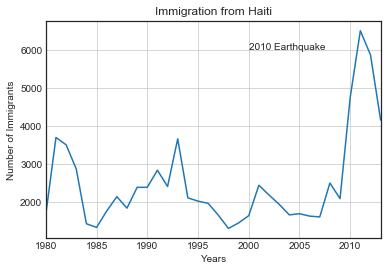

In [9]:
#Line plot 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

years= list(map(int, range(1980,2014)))

df_canada.loc['Haiti',years].plot(kind='line')
plt.title("Immigration from Haiti")
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake') # see note below
plt.grid()
plt.show()

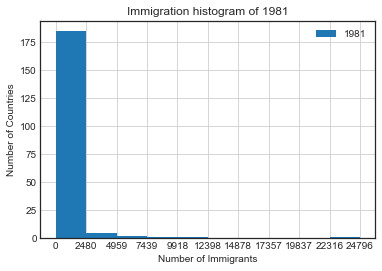

In [10]:
count, binedge = np.histogram(df_canada[[1981]])
df_canada[[1981]].plot(kind='hist',xticks=binedge)
plt.title("Immigration histogram of 1981")
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.grid()
plt.show()

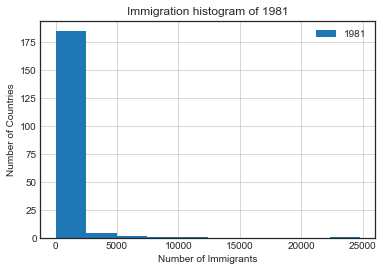

In [11]:
df_canada[[1981]].plot(kind='hist')
plt.title("Immigration histogram of 1981")
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.grid()
plt.show()

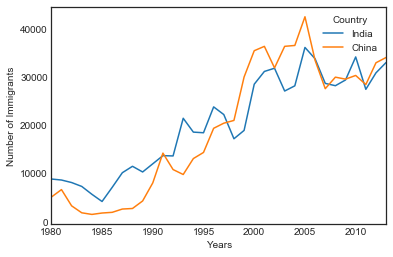

In [12]:
#Get data for India and China 
df_CI = df_canada.loc[['India','China'],years]
df_CI = df_CI.transpose()
df_CI.plot(kind='line')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

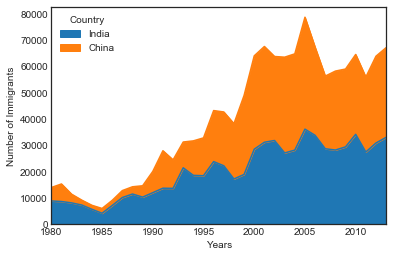

In [13]:
df_CI.plot(kind='Area')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

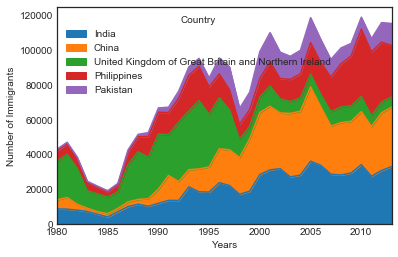

In [14]:
#Area plot for top 5 countries 
df_canada = df_canada.sort_values(by='Total',ascending=False,inplace=False )
df_top5 = df_canada[years].head(5)
df_top5 = df_top5.transpose()
df_top5

df_top5.plot(kind="Area")
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [15]:
#list all color in matplotlib
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


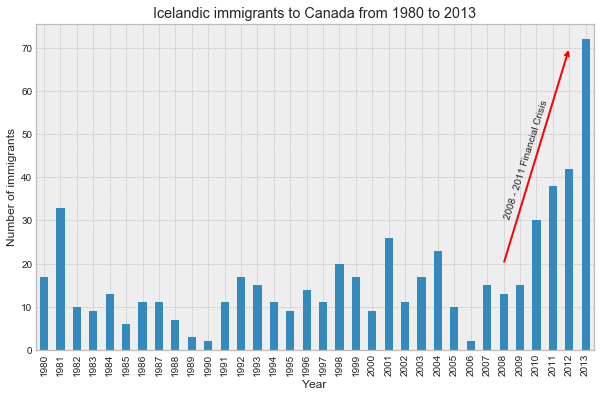

In [33]:
#Bar chart 
df_iceland = df_canada.loc['Iceland', years]
# plot bar chart using scripting layer
mpl.style.use(['bmh'])
df_iceland.plot(kind="bar",figsize=(10, 6))
#Add arrow annotation 
# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.title("Icelandic immigrants to Canada from 1980 to 2013")
plt.show()

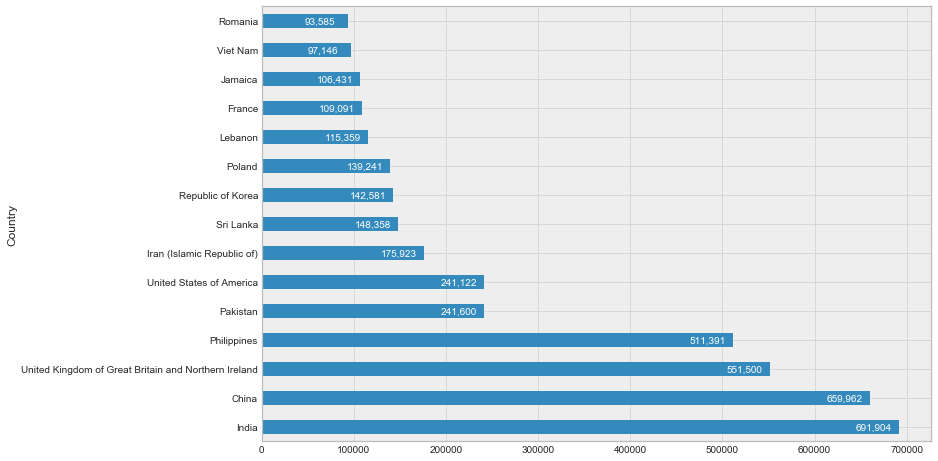

In [37]:
#horiztal Bar charts 
df_top15 = df_canada['Total'].head(15)
df_top15

df_top15.plot(kind="barh",figsize=(12,8))
# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

In [40]:
for index, value in enumerate(df_top15):
    print(index,format(int(value),","))

0 691,904
1 659,962
2 551,500
3 511,391
4 241,600
5 241,122
6 175,923
7 148,358
8 142,581
9 139,241
10 115,359
11 109,091
12 106,431
13 97,146
14 93,585


In [1]:
!pip install folium

In [16]:
import folium 
Chizhou_map=folium.Map(location=[30.65,117.48],zoom_start=4)
Chizhou = folium.map.FeatureGroup()
Chizhou.add_child(folium.features.CircleMarker([30.65,117.48],radius=6,color='red',fill_color='red'))
Chizhou_map.add_child(Chizhou)

folium.Marker([30.65,117.48],popup='Chizhou').add_to(Chizhou_map)
Chizhou_map

In [2]:
!pip install jupyter-dash

In [5]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\mingms01\AppData\Roaming\Python\Python37\site-packages\retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "C:\Users\mingms01\AppData\Roaming\Python\Python37\site-packages\retrying.py", line 212, in call
    raise attempt.get()
  File "C:\Users\mingms01\AppData\Roaming\Python\Python37\site-packages\retrying.py", line 247, in get
    six.reraise(self.value[0], self.value[1], self.value[2])
  File "C:\Users\mingms01\AppData\Roaming\Python\Python37\site-packages\six.py", line 703, in reraise
    raise value
  File "C:\Users\mingms01\AppData\Roaming\Python\Python37\site-packages\retrying.py", line 200, in call
    attempt = Attempt(fn(*args, **kwargs), at

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8050): Max retries exceeded with url: /_alive_80700290-112d-4092-956f-b025ec251391 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001D348E8C550>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))